In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("E:/ML_FDP_Program/LP-I/assignment 3/Admission_Predict.csv")

In [5]:
print(data.shape)
print(data.head())
print(data.columns)

(400, 9)
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [6]:
print(data.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.34000

In [7]:
features_cols = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']
X = data[features_cols]

data['Chance of Admit '] = np.where(data['Chance of Admit ']>=0.9,1,0)
print(data['Chance of Admit '].head())
Y = data['Chance of Admit ']

0    1
1    0
2    0
3    0
4    0
Name: Chance of Admit , dtype: int32


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3)

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Y_train_pred = clf.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, Y_train_pred))#training accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))#testing accuracy

clf1 = DecisionTreeClassifier()
print(cross_val_score(clf1, x_train, y_train, cv=10, scoring='accuracy').mean())

Accuracy: 1.0
Accuracy: 0.95
0.9607142857142856


[Text(167.40000000000003, 201.90857142857143, 'X[6] <= 9.235\ngini = 0.24\nsamples = 280\nvalue = [241, 39]'),
 Text(100.44000000000001, 170.84571428571428, 'X[1] <= 335.0\ngini = 0.04\nsamples = 243\nvalue = [238, 5]'),
 Text(66.96000000000001, 139.78285714285715, 'X[6] <= 9.155\ngini = 0.025\nsamples = 241\nvalue = [238, 3]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 230\nvalue = [230, 0]'),
 Text(100.44000000000001, 108.72, 'X[6] <= 9.165\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(66.96000000000001, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(133.92000000000002, 77.65714285714284, 'X[4] <= 4.75\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(100.44000000000001, 46.59428571428572, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(167.40000000000003, 46.59428571428572, 'X[5] <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.880000

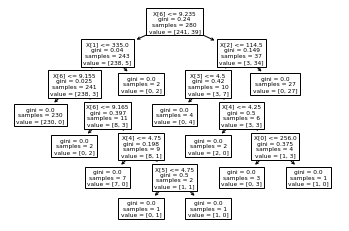

In [9]:
from sklearn import tree
tree.plot_tree(clf)

In [12]:
from sklearn.tree import export_graphviz

In [1]:
!pip install graphviz

In [3]:
conda install graphviz


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: E:\Anaconda\envs\FDP



In [1]:
import graphviz

In [12]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data =StringIO()
#export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features_cols, class_names=['0','1'])
data1= export_graphviz(clf, out_file=None, feature_names=features_cols)
graph = pydotplus.graph_from_dot_data(data1)
#graph = pydotplus.graph_from_dot_data(data1)
graph.write_png('admission.png')

#Image(graph.create_png())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [14]:
data = tree.export_graphviz(clf, out_file=None, feature_names=features_cols)
graph = pydotplus.graph_from_dot_data(data) # <-------- LOOK HERE
graph.write_png('mydecisiontree.png')
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

InvocationException: GraphViz's executables not found